Instala bibliotecas

In [6]:
!pip install -q ultraplot==1.10.0 cartopy salem rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 89.2 MB/s eta 0:00:00


Leitura do netcdf de focos de calor de 2024-08

In [7]:
import xarray as xr
ds = xr.open_dataset('https://github.com/evmpython/2_codigos_gerais/raw/refs/heads/main/input/focos_mensal_brasil_AQUA_202408.nc')
ds

<xarray.Dataset> Size: 356kB
Dimensions:  (lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 2kB 7.0 6.8 6.6 6.4 6.2 ... -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 2kB -75.0 -74.8 -74.6 -74.4 ... -33.6 -33.4 -33.2
    time     datetime64[ns] 8B ...
Data variables:
    focos    (lat, lon) float64 353kB ...

Leitura da localização das estações

In [8]:
import pandas as pd
df_estacoes = pd.read_excel('https://github.com/evmpython/2_codigos_gerais/raw/refs/heads/main/input/Informa%C3%A7%C3%B5es-esta%C3%A7%C3%B5es.xlsx')
df_estacoes.iloc[6,0] = 'Campinas'
df_estacoes.iloc[10,0] = 'Cubatão'
df_estacoes.iloc[16,0] = 'Guarulhos'
df_estacoes.iloc[17,0] = 'Santo André'
#df_estacoes = df_estacoes.drop(14) # São Caetano do Sul não tem dados
df_estacoes.iloc[14,4] = '-99.9'
df_estacoes.iloc[14,5] = '-99.9'
df_estacoes

,Estação,Código,Lat,Lon,PM10 (%),O3 (%)
0,Presidente Prudente,114,-22.11990,-51.40880,88.26,90.28
1,Araçatuba,107,-21.18680,-50.43930,86.71,85.62
2,São José do Rio Preto,116,-20.78470,-49.39830,86.85,82.51
3,Ribeirão Preto,288,-21.17708,-47.81900,76.71,69.58
4,Jaú,110,-22.29862,-48.56746,91.18,84.70
5,Jundiaí,109,-23.19200,-46.89710,92.07,89.68
6,Campinas,276,-22.87462,-47.05897,87.62,83.21
7,Paulínia,117,-22.77232,-47.15484,88.12,84.65
8,São José dos Campos,88,-23.18789,-45.87120,91.45,88.97
9,Guaratinguetá,289,-22.80192,-45.19112,63.40,82.89


Leitura do shapefile do estado de SP

In [10]:
import salem

# leitura do shapefile de SP
shapefile_sp = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp')

# recorta o dado para região
ds_sp = ds.salem.roi(shape=shapefile_sp)
ds_sp

<xarray.Dataset> Size: 356kB
Dimensions:  (lat: 210, lon: 210)
Coordinates:
  * lat      (lat) float64 2kB 7.0 6.8 6.6 6.4 6.2 ... -34.2 -34.4 -34.6 -34.8
  * lon      (lon) float64 2kB -75.0 -74.8 -74.6 -74.4 ... -33.6 -33.4 -33.2
    time     datetime64[ns] 8B ...
Data variables:
    focos    (lat, lon) float64 353kB nan nan nan nan nan ... nan nan nan nan
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

Plota figura

Processando ===>>> 0-2024-01
Processando ===>>> 1-2024-02
Processando ===>>> 2-2024-03
Processando ===>>> 3-2024-04
Processando ===>>> 4-2024-05
Processando ===>>> 5-2024-06
Processando ===>>> 6-2024-07
Processando ===>>> 7-2024-08
Processando ===>>> 8-2024-09
Processando ===>>> 9-2024-10
Processando ===>>> 10-2024-11
Processando ===>>> 11-2024-12
CPU times: user 9.3 s, sys: 281 ms, total: 9.58 s
Wall time: 16 s


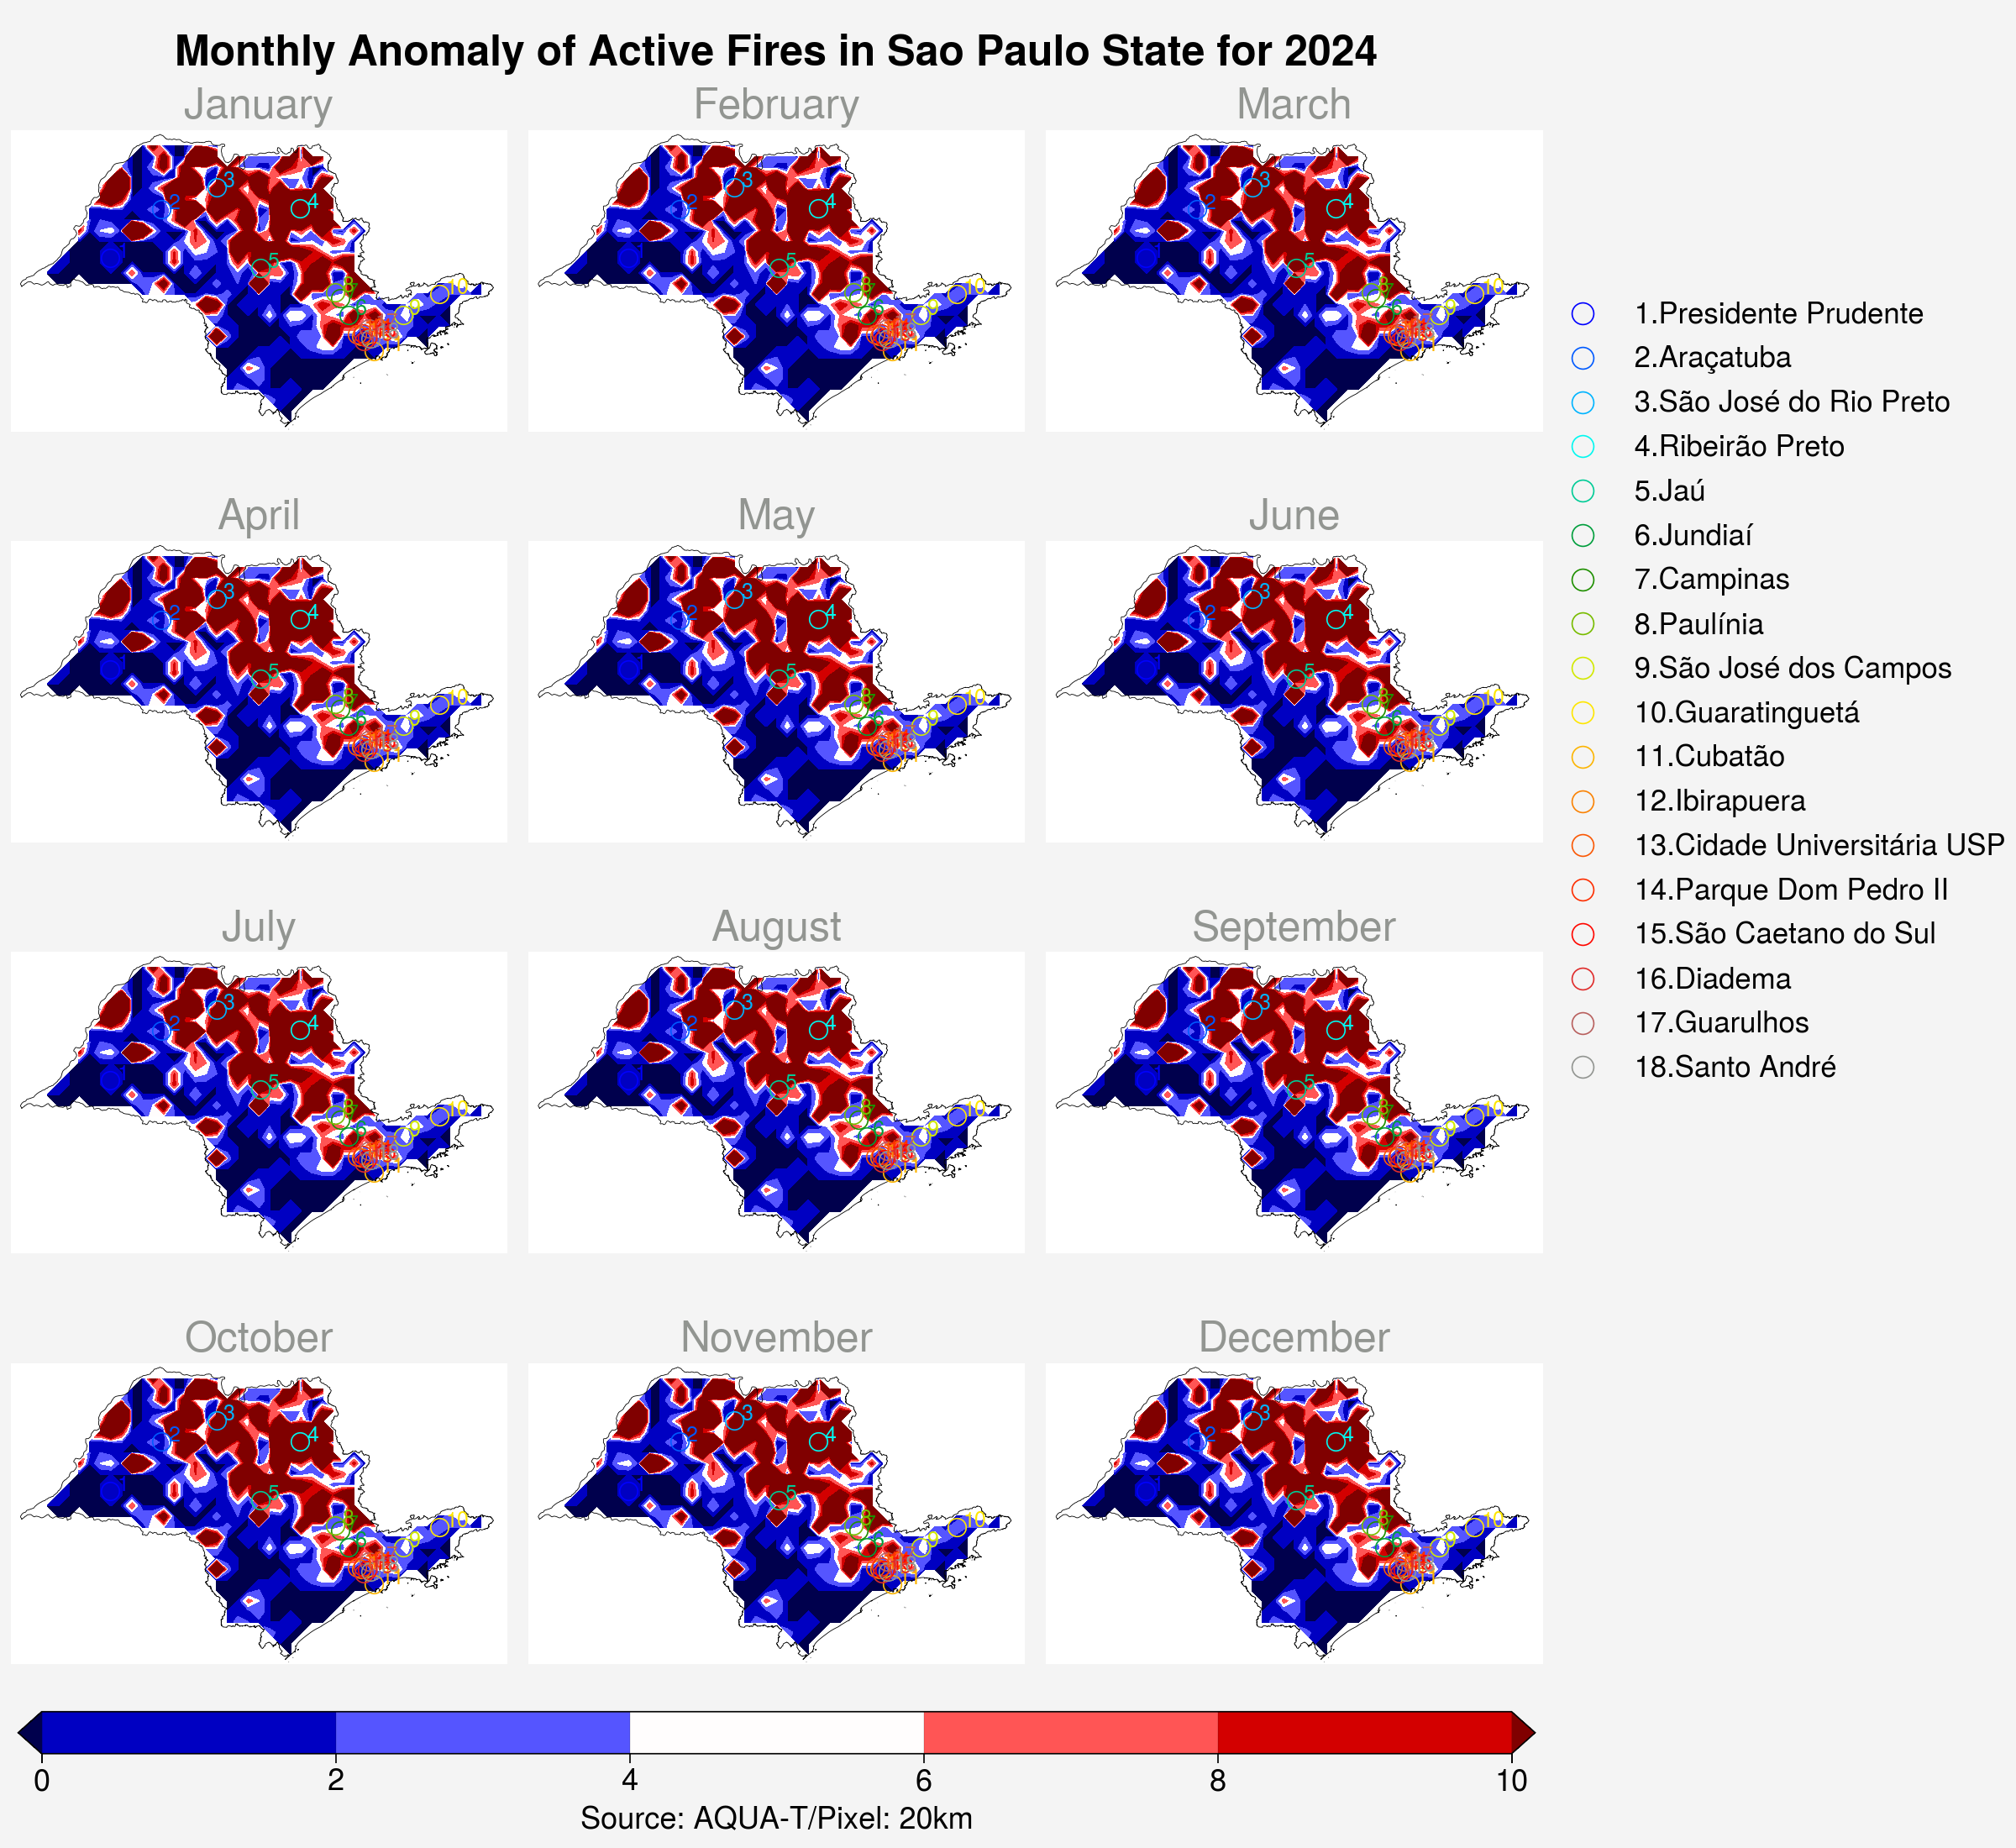

In [13]:
%%time
# import bibliotecas
import ultraplot as uplt
import cartopy.io.shapereader as shpreader
import cartopy, cartopy.crs as ccrs
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Limites de SP
lonmin, lonmax, latmin, latmax = -53.3, -43.9, -25.4, -19.7

# meses
#meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(12,11),
                        nrows=4, ncols=3,
                        tight=True,
                        proj='pcarree',
                        sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=False, latlines=5, lonlines=10,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          suptitle=f'Monthly Anomaly of Active Fires in Sao Paulo State for 2024',
          small='20px', large='25px',
          linewidth=0, grid=False)

#--------------------------------------------------------------------#

# monta paleta de cores
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('azul_vermelho', ['blue', 'cyan', 'green', 'yellow', 'orange', 'red', 'gray'], N=18)
cores_18 = [cmap(i) for i in range(18)]  # Cores no formato RGBA

# estações
#--------------------------------------------------------------------------------------------------------#
for j in range(len(df_estacoes)):

    # extrai informações da estação
    codigo = df_estacoes['Código'].iloc[j]
    municipio = df_estacoes['Estação'].iloc[j]
    lat = df_estacoes['Lat'].iloc[j]
    lon = df_estacoes['Lon'].iloc[j]
    pm10 = df_estacoes['PM10 (%)'].iloc[j]
    o3 = df_estacoes['O3 (%)'].iloc[j]

    # plota o símbolo da estação
    ax.scatter(lon,
               lat,
               transform=ccrs.PlateCarree(),
               marker='o',
               s=60,
               facecolors='none',
               edgecolors=cores_18[j],
               zorder=2,
               label=f' {j+1}.{municipio}')
    ax.text(lon+0.12, lat, j+1, color=cores_18[j], s=10, transform=ccrs.PlateCarree(), zorder=4)

# legenda
ax[5].legend( loc='r', ncols=1, frameon=False, prop={'size': 12.5}, markerscale=1.2)
#--------------------------------------------------------------------------------------------------------#

# loop dos meses de 2024
i=0
for data in pd.date_range('20240101', '20241231', freq='1M'):

    # estrai ano e mês
    ano = data.strftime('%Y')
    mes = data.strftime('%m')

    print('Processando ===>>>', f'{i}-{ano}-{mes}')


    if i==0:

        # plota figura
        map1 = ax[i].contourf(ds_sp['lon'],
                              ds_sp['lat'],
                              ds_sp['focos'],
                              cmap='seismic',
                              vmin=0, vmax=10,
                              levels=uplt.arange(0, 10, 2),
                              extend='both')

    else:
        ax[i].contourf(ds_sp['lon'],
                       ds_sp['lat'],
                       ds_sp['focos'],
                       cmap='seismic',
                       vmin=0, vmax=10,
                       levels=uplt.arange(0, 10, 2),
                       extend='both')

    # plota titulo de cada figura
    mesint = int(mes)
    ax[i].format(title=f'{meses[mesint-1]}', labels = False, titleloc='c', titlecolor='grey')

    # shapefile
    shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/UFs/SP/SP_UF_2019.shp').geometries())
    ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.3)

    i+=1

# plota barra de cores da figura
fig.colorbar(map1,
             loc='b',
             label='Source: AQUA-T/Pixel: 20km',
             ticks=2,
             ticklabelsize=13,
             labelsize=13,
             length=0.99,
             width=0.25)